In [1]:
# https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41
# # https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML # display media control overlay
from tqdm import tqdm # show progress bar during loops
%matplotlib inline

In [2]:
# load in dataset
# this is a good dataset that broke down the time stamps into M/D/YY
# It also has 5678 data points for all countries affected by COVID-19
df = pd.read_csv('covid_19_data.csv')
print(df.info()) 
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341 entries, 0 to 11340
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              11341 non-null  int64  
 1   ObservationDate  11341 non-null  object 
 2   Province/State   7746 non-null   object 
 3   Country/Region   11341 non-null  object 
 4   Last Update      11341 non-null  object 
 5   Confirmed        11341 non-null  float64
 6   Deaths           11341 non-null  float64
 7   Recovered        11341 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 708.9+ KB
None


SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0

In [3]:
# I like to lower case and add underscores to my column names for easier access
df.columns = [x.lower() for x in df.columns]
df.columns = [x.replace(' ', '_') for x in df.columns]
df.columns

Index(['sno', 'observationdate', 'province/state', 'country/region',
       'last_update', 'confirmed', 'deaths', 'recovered'],
      dtype='object')

## Minor Cleaning

In [4]:
#turn numbers to integers as there cannot be a 4.5 confirmed sick person
df['confirmed'] = df['confirmed'].apply(lambda x: int(x))
df['deaths'] = df['deaths'].apply(lambda x: int(x))
df['recovered'] = df['recovered'].apply(lambda x: int(x))
#show final
df['confirmed'].head(3)

0     1
1    14
2     6
Name: confirmed, dtype: int64

In [5]:
#change 'observationdate' column into datetime
from datetime import date
from datetime import datetime
# this code turns string '03/23/2020' to 2020-0323, which is in datetime format
print(datetime.strptime(df['observationdate'][10000], "%m/%d/%Y").date())

# make every string date into datetime format using .apply method
df['observationdate'] = df['observationdate'].apply(
    lambda x: datetime.strptime(x, "%m/%d/%Y").date())

2020-03-23


In [6]:
#so in these projects, there can be some nasty bugs that are sitting in the dataset that break your code
#i spent a while trying to figure this one out. Happy to have exterminated it.

#check for NaN values in the province/state column and fill with country name
df[df['province/state'].isna()]
df['province/state'].fillna(df['country/region'], inplace=True)

## Organizing the Race Piece by Piece

In [7]:
# we will put this together piece by piece starting with the first day of the race

# set starting date equal to beginning date
beginning_date = df['observationdate'].sort_values(ascending=True).head(1).item()

#create starting bar chart race from the first day
dff = (df[df['observationdate'].eq(beginning_date)]
       .sort_values(by='confirmed', ascending=False)
       .head(10))

dff

sno observationdate province/state  country/region      last_update  \
13   14      2020-01-22          Hubei  Mainland China  1/22/2020 17:00   
5     6      2020-01-22      Guangdong  Mainland China  1/22/2020 17:00   
1     2      2020-01-22        Beijing  Mainland China  1/22/2020 17:00   
34   35      2020-01-22       Zhejiang  Mainland China  1/22/2020 17:00   
25   26      2020-01-22       Shanghai  Mainland China  1/22/2020 17:00   
2     3      2020-01-22      Chongqing  Mainland China  1/22/2020 17:00   
27   28      2020-01-22        Sichuan  Mainland China  1/22/2020 17:00   
11   12      2020-01-22          Henan  Mainland China  1/22/2020 17:00   
29   30      2020-01-22        Tianjin  Mainland China  1/22/2020 17:00   
8     9      2020-01-22         Hainan  Mainland China  1/22/2020 17:00   

    confirmed  deaths  recovered  
13        444      17         28  
5          26       0          0  
1          14       0          0  
34         10       0          0  
25          9       0          0  
2           6       0          0  
27          5       0          0  
11          5       0          0  
29          4       0          0  
8           4       0          0

<BarContainer object of 10 artists>

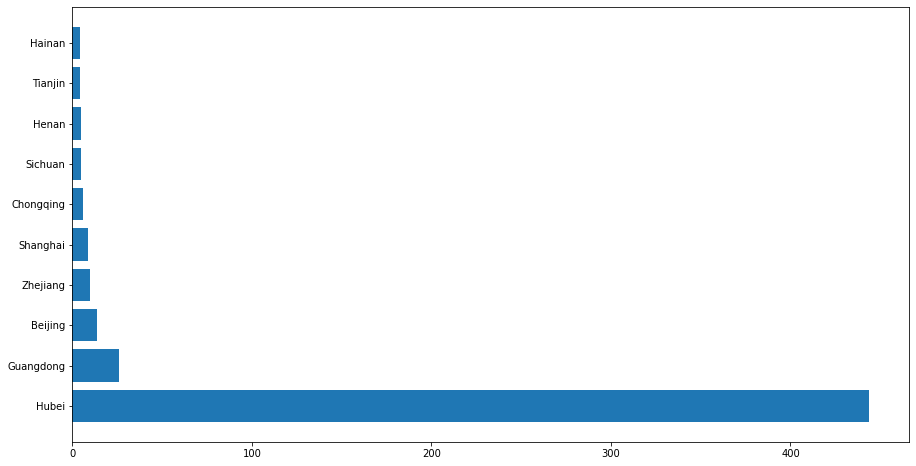

In [8]:
# plot out horizontal bar chart
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(dff['province/state'], dff['confirmed']) #plug in your x and y, y being the horse you want to race

In [9]:
colors =  ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50', '#adb0ff', '#ffb3ff']

# this is NOT set_index for our .head dataframe but our original one 'df'
group_lk = df.set_index('province/state')['country/region'].to_dict()
group_lk

{'Anhui': 'Mainland China',
 'Beijing': 'Mainland China',
 'Chongqing': 'Mainland China',
 'Fujian': 'Mainland China',
 'Gansu': 'Mainland China',
 'Guangdong': 'Mainland China',
 'Guangxi': 'Mainland China',
 'Guizhou': 'Mainland China',
 'Hainan': 'Mainland China',
 'Hebei': 'Mainland China',
 'Heilongjiang': 'Mainland China',
 'Henan': 'Mainland China',
 'Hong Kong': 'Hong Kong',
 'Hubei': 'Mainland China',
 'Hunan': 'Mainland China',
 'Inner Mongolia': 'Mainland China',
 'Jiangsu': 'Mainland China',
 'Jiangxi': 'Mainland China',
 'Jilin': 'Mainland China',
 'Liaoning': 'Mainland China',
 'Macau': 'Macau',
 'Ningxia': 'Mainland China',
 'Qinghai': 'Mainland China',
 'Shaanxi': 'Mainland China',
 'Shandong': 'Mainland China',
 'Shanghai': 'Mainland China',
 'Shanxi': 'Mainland China',
 'Sichuan': 'Mainland China',
 'Taiwan': 'Taiwan',
 'Tianjin': 'Mainland China',
 'Tibet': 'Mainland China',
 'Washington': 'US',
 'Xinjiang': 'Mainland China',
 'Yunnan': 'Mainland China',
 'Zhejiang':

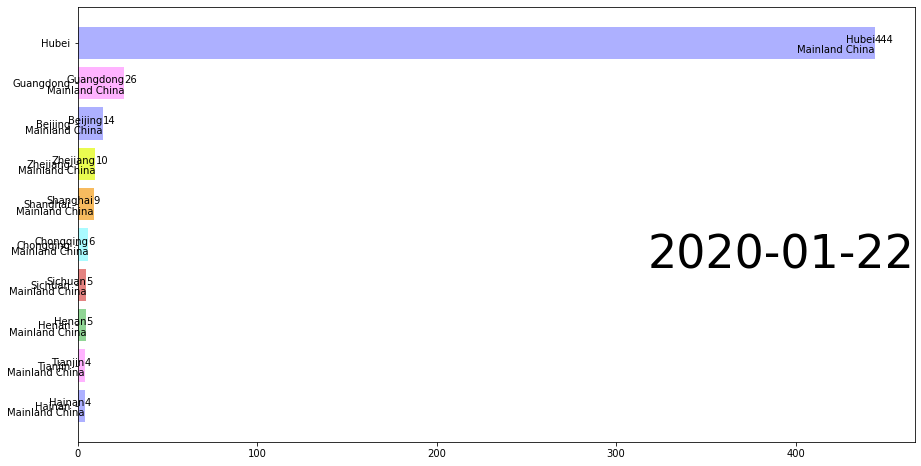

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['province/state'], dff['confirmed'], color=colors)

# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)

for i, (confirmed, province_state) in enumerate(zip(dff['confirmed'], dff['province/state'])):
    ax.text(confirmed, i,     province_state,            ha='right')  # Tokyo: name
    ax.text(confirmed, i-.25, group_lk[province_state],  ha='right')  # Asia: group name
    ax.text(confirmed, i,     confirmed,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, beginning_date, transform=ax.transAxes, size=46, ha='right');

## Calculate number of days that our data covers

In [11]:
# datetime(2019,12,31) - datetime(2019,12,31) This works!
days_since = abs((df['observationdate'].sort_values(ascending=True).head(1).item() - 
                  df['observationdate'].sort_values(ascending=False).head(1).item()).days)
days_since

61

In [12]:
# create a date time range that covers our data from beginning to last day of reported cases

beginning_date = df['observationdate'].sort_values(ascending=True).head(1).item()

date_list = pd.date_range(beginning_date, periods=days_since).to_list() # create a range of date
# snippet of days to 
date_list

[Timestamp('2020-01-22 00:00:00', freq='D'),
 Timestamp('2020-01-23 00:00:00', freq='D'),
 Timestamp('2020-01-24 00:00:00', freq='D'),
 Timestamp('2020-01-25 00:00:00', freq='D'),
 Timestamp('2020-01-26 00:00:00', freq='D'),
 Timestamp('2020-01-27 00:00:00', freq='D'),
 Timestamp('2020-01-28 00:00:00', freq='D'),
 Timestamp('2020-01-29 00:00:00', freq='D'),
 Timestamp('2020-01-30 00:00:00', freq='D'),
 Timestamp('2020-01-31 00:00:00', freq='D'),
 Timestamp('2020-02-01 00:00:00', freq='D'),
 Timestamp('2020-02-02 00:00:00', freq='D'),
 Timestamp('2020-02-03 00:00:00', freq='D'),
 Timestamp('2020-02-04 00:00:00', freq='D'),
 Timestamp('2020-02-05 00:00:00', freq='D'),
 Timestamp('2020-02-06 00:00:00', freq='D'),
 Timestamp('2020-02-07 00:00:00', freq='D'),
 Timestamp('2020-02-08 00:00:00', freq='D'),
 Timestamp('2020-02-09 00:00:00', freq='D'),
 Timestamp('2020-02-10 00:00:00', freq='D'),
 Timestamp('2020-02-11 00:00:00', freq='D'),
 Timestamp('2020-02-12 00:00:00', freq='D'),
 Timestamp

In [13]:
df['country/region'].value_counts()

US                 4796
Mainland China     1920
Australia           331
Canada              266
France              136
                   ... 
('St. Martin',)       1
Belize                1
Channel Islands       1
North Ireland         1
Gambia                1
Name: country/region, Length: 203, dtype: int64

In [14]:
group_lk

{'Anhui': 'Mainland China',
 'Beijing': 'Mainland China',
 'Chongqing': 'Mainland China',
 'Fujian': 'Mainland China',
 'Gansu': 'Mainland China',
 'Guangdong': 'Mainland China',
 'Guangxi': 'Mainland China',
 'Guizhou': 'Mainland China',
 'Hainan': 'Mainland China',
 'Hebei': 'Mainland China',
 'Heilongjiang': 'Mainland China',
 'Henan': 'Mainland China',
 'Hong Kong': 'Hong Kong',
 'Hubei': 'Mainland China',
 'Hunan': 'Mainland China',
 'Inner Mongolia': 'Mainland China',
 'Jiangsu': 'Mainland China',
 'Jiangxi': 'Mainland China',
 'Jilin': 'Mainland China',
 'Liaoning': 'Mainland China',
 'Macau': 'Macau',
 'Ningxia': 'Mainland China',
 'Qinghai': 'Mainland China',
 'Shaanxi': 'Mainland China',
 'Shandong': 'Mainland China',
 'Shanghai': 'Mainland China',
 'Shanxi': 'Mainland China',
 'Sichuan': 'Mainland China',
 'Taiwan': 'Taiwan',
 'Tianjin': 'Mainland China',
 'Tibet': 'Mainland China',
 'Washington': 'US',
 'Xinjiang': 'Mainland China',
 'Yunnan': 'Mainland China',
 'Zhejiang':

In [15]:
df.iloc[2195]['province/state']

'Hubei'

In [16]:
dff['confirmed'].max() / 100

4.44

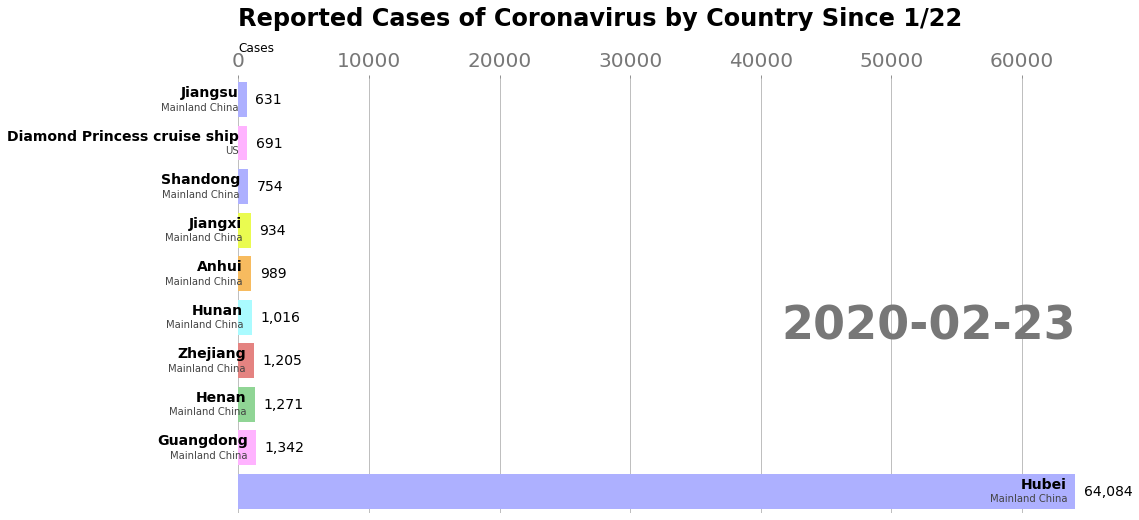

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(date):
    dff = df[df['observationdate'].eq(date)].sort_values(by='confirmed', ascending=False).head(10)
    ax.clear() # you need this to help you refresh the axes for the next graphic 
    ax.barh(dff['province/state'], dff['confirmed'], color=colors)
    dx = dff['confirmed'].max() / 100

    # create loop
    for i, (confirmed, province_state) in enumerate(zip(dff['confirmed'], dff['province/state'])):
        
        ax.text(confirmed-dx, i,     province_state,           size=14, weight=600, ha='right', va='bottom') # Tokyo: name
        ax.text(confirmed-dx, i-.25, group_lk[province_state], size=10, color='#444444', ha='right', va='baseline') # Asia: group name
        ax.text(confirmed+dx, i,     f'{confirmed:,.0f}',  size=14, ha='left',  va='center') # 38194.2: value

        
#     # ... code to polish style below ... #

    ax.text(1, 0.4, date.date(), transform=ax.transAxes, 
            color='#777777', size=46, ha='right', 
            weight=800) #toggle big "current date" on white space

    ax.text(0, 1.06, 'Cases', transform=ax.transAxes, size=12, color='#000000') #sets cases word in top corner
#     ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) 
    ax.xaxis.set_ticks_position('top') # sets tick positions on top of plot
    ax.tick_params(axis='x', colors='#777777', labelsize=20) # adjust size of x labels (ticks)
    ax.tick_params(axis='y', colors='#000000', labelsize=15) # adjust size of y labels (ticks)
    ax.set_yticks([]) # removes y labels
    ax.margins(0, 0.01) #sets space between bars
    ax.grid(which='major', axis='x', linestyle='-') # sets vertical lines as place markers through race
    ax.set_axisbelow(True) 

    
    ax.text(0, 1.12, 'Reported Cases of Coronavirus by Country Since 1/22',
            transform=ax.transAxes, size=24, weight=600, ha='left')

    
# #     ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
#             color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
    
draw_barchart(date_list[32]) # ascending = false. and head -- Correct!

In [18]:
# debugging, found you you little bugger
df[df['observationdate'] == date_list[33]].head(20)
type(df[(df['observationdate'] == date_list[33]) & (df['country/region'] == 'South Korea')]['province/state'].item())


str

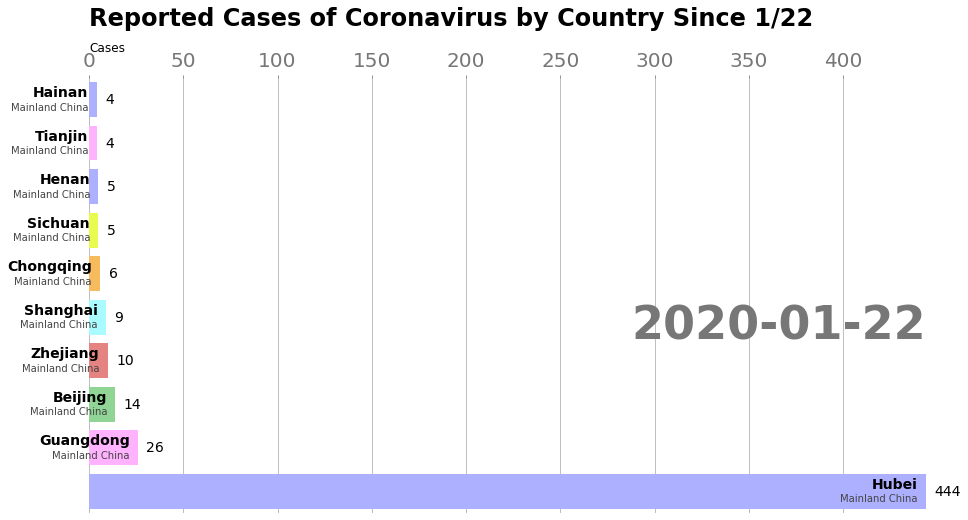

In [21]:
## import matplotlib.animation as our animator
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, 
                                   frames=date_list)

#Chris, debug at date_list[30:], 33 to be exact

HTML(animator.to_jshtml())  # animator tool bar

In [22]:
# essentially this code gets all the countries and cities
# i'm going to create a copy of this and get the countries only